In [25]:
%pylab inline
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

Populating the interactive namespace from numpy and matplotlib


In [26]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
target_names (10,)
images (1797, 8, 8)
DESCR


In [35]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [33]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

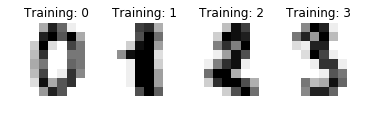

In [39]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

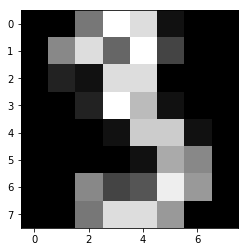

In [64]:
plt.imshow(digits.images[3], cmap="gray", interpolation='nearest')

In [58]:
n_samples = len(digits.images)
n_samples

1797

## 手寫數字辨識

In [159]:
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta

In [160]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [161]:
x0_train.shape

(60000, 28, 28)

In [162]:
y0_train.shape

(60000,)

In [163]:
y0_train[5]

2

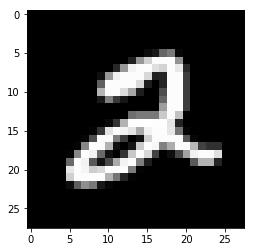

In [164]:
plt.imshow(x0_train[5], cmap="gray", interpolation='nearest')

In [165]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255 #normalize
x_test = x_test / 255   #normalize

In [166]:
x_train[0].shape

(28, 28, 1)

In [167]:
y0_train[0]

5

In [168]:
#one-hot encoding去除連續的關係
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [169]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [170]:
x_train.shape[1:]

(28, 28, 1)

In [171]:
model = Sequential()

In [172]:
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(28,28,1)))#padding是外面填一層0
model.add(Activation('relu'))#可有可無，沒加上就是內積的結果

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3), padding='same')) #filter要越來越多
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200))#200個神經元
model.add(Activation('relu'))

model.add(Dense(10))#10個輸出
model.add(Activation('softmax'))#加起來是1，機率

model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 20)        1820      
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 120)         21720     
__________

In [173]:
model.fit(x_train, y_train, batch_size=128, epochs=12)#取12次

Epoch 1/12
60000/60000 [==============================] - 23s - loss: 0.3469 - acc: 0.8910    
Epoch 2/12
60000/60000 [==============================] - 24s - loss: 0.0677 - acc: 0.9789    
Epoch 3/12
60000/60000 [==============================] - 23s - loss: 0.0494 - acc: 0.9846    
Epoch 4/12
60000/60000 [==============================] - 22s - loss: 0.0402 - acc: 0.9875    
Epoch 5/12
60000/60000 [==============================] - 25s - loss: 0.0330 - acc: 0.9901    
Epoch 6/12
60000/60000 [==============================] - 23s - loss: 0.0286 - acc: 0.9914    
Epoch 7/12
60000/60000 [==============================] - 23s - loss: 0.0249 - acc: 0.9922    
Epoch 8/12
60000/60000 [==============================] - 24s - loss: 0.0213 - acc: 0.9933    
Epoch 9/12
60000/60000 [==============================] - 26s - loss: 0.0184 - acc: 0.9941    
Epoch 10/12
60000/60000 [==============================] - 25s - loss: 0.0163 - acc: 0.9950    
Epoch 11/12
60000/60000 [========================

In [175]:
result = model.predict_classes(x_test)

 9824/10000 [============================>.] - ETA: 0s

In [176]:
result

array([7, 2, 1, ..., 4, 5, 6])

In [177]:
pick = np.random.randint(1,9999, 25)

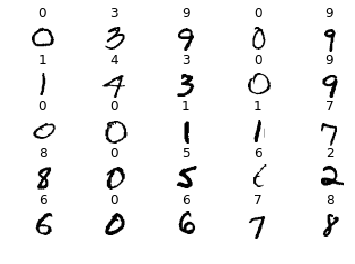

In [179]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.title(result[pick[i]])
    plt.axis("off")

In [181]:
score = model.evaluate(x_test, y_test)

 9920/10000 [============================>.] - ETA: 0s

In [183]:
score

[0.023951783636595066, 0.99129999999999996]

In [185]:
loss, acc = score #testing data的成功率是沒看過的資料

In [186]:
print(acc)

0.9913
